# Exploratory Data Analysis

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from pathlib import Path
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from statsmodels.graphics.mosaicplot import mosaic


In [81]:
# Import training dataset
dataset = Path('../dataset')
df = pd.read_csv(dataset/"accidents_train.csv")
df.head()

,Num,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,1,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,2,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,3,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,5,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [82]:
df.columns

Index(['Num', 'Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [83]:
df.shape

(8210, 33)

Original dataset has 8210 rows  and 33 features. 
The target feature is "Accident_severity". 

In [84]:
target = 'Accident_severity'
my_list = df.columns.tolist()
set3 = my_list[21:33]
print(len(set3), set3)

12 ['Number_of_vehicles_involved', 'Number_of_casualties', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


## Dataset split into 3 sets of features for EDA by team

In [85]:
features = my_list[21:33]
df1 = df[features]

df1.head()

,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [86]:
# Import custom functions
%run ../custom/jc-functions.ipynb

## Data Understanding

In [87]:
# Set continuous and categorical features 
cont_feat = ['Number_of_vehicles_involved', 'Number_of_casualties']
cat_feat = ['Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']

#### Unique values for continuous features:

In [88]:
for feat in cont_feat:
    list = df1[feat].unique()
    print(f"{feat}: There are {len(list)} unique items in this list. \n {list}")

Number_of_vehicles_involved: There are 6 unique items in this list. 
 [2 1 3 6 4 7]
Number_of_casualties: There are 8 unique items in this list. 
 [2 1 3 4 6 5 8 7]


#### Unique values for categorical features: 

In [89]:
for feat in cat_feat:
    list = df1[feat].unique()
    print(f"{feat}: There are {len(list)} unique items in this list. \n {list}")

Vehicle_movement: There are 14 unique items in this list. 
 ['Going straight' 'U-Turn' 'Moving Backward' 'Turnover' 'Waiting to go'
 'Getting off' 'Reversing' 'Unknown' 'Parked' 'Stopping' 'Overtaking'
 'Other' 'Entering a junction' nan]
Casualty_class: There are 4 unique items in this list. 
 ['na' 'Driver or rider' 'Pedestrian' 'Passenger']
Sex_of_casualty: There are 3 unique items in this list. 
 ['na' 'Male' 'Female']
Age_band_of_casualty: There are 6 unique items in this list. 
 ['na' '31-50' '18-30' 'Under 18' 'Over 51' '5']
Casualty_severity: There are 4 unique items in this list. 
 ['na' '3' '2' '1']
Work_of_casuality: There are 8 unique items in this list. 
 [nan 'Driver' 'Other' 'Unemployed' 'Employee' 'Self-employed' 'Student'
 'Unknown']
Fitness_of_casuality: There are 6 unique items in this list. 
 [nan 'Normal' 'Deaf' 'Other' 'Blind' 'NormalNormal']
Pedestrian_movement: There are 9 unique items in this list. 
 ['Not a Pedestrian' "Crossing from driver's nearside"
 'Crossi

## Data Quality Report

### Continuous Features

In [90]:
data_quality_report_cont(df1, cont_feat)

Data Quality for Continous Features
Total Features: 2
                       Feature  Count  Missing  % missing  Cardinality
0  Number_of_vehicles_involved   8210        0        0.0            6
1         Number_of_casualties   8210        0        0.0            8


Descriptive Stats
                              count  mean   std  min  25%  50%  75%  max
Number_of_vehicles_involved  8210.0  2.01  0.64  1.0  2.0  2.0  2.0  7.0
Number_of_casualties         8210.0  1.51  0.97  1.0  1.0  1.0  2.0  8.0


There are no missing values in the continuous variables. 
Therefore, no imputation or data cleaning required.

### Categorical Features

In [91]:
data_quality_report_cat(df1, cat_feat)

Data Quality Report for Categorical Features
Stats
-----
                Feature  Count  Missing  % Missing  Cardinality
0      Vehicle_movement   8026      184       2.29           14
1        Casualty_class   8210        0       0.00            4
2       Sex_of_casualty   8210        0       0.00            3
3  Age_band_of_casualty   8210        0       0.00            6
4     Casualty_severity   8210        0       0.00            4
5     Work_of_casuality   6062     2148      35.43            8
6  Fitness_of_casuality   6440     1770      27.48            6
7   Pedestrian_movement   8210        0       0.00            9
8     Cause_of_accident   8210        0       0.00           20
9     Accident_severity   8210        0       0.00            3


Mode 1
------
                Feature            Mode 1  Mode 1 Freq.  Mode 1 %
0      Vehicle_movement    Going straight          5481     68.29
1        Casualty_class   Driver or rider          3201     38.99
2       Sex_of_casualty  

Three features have missing values. Since less than 60% of the values are 
missing, missing values will be imputed with the mode.  

In [92]:
df1.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8210 entries, 0 to 8209
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Number_of_vehicles_involved  8210 non-null   int64 
 1   Number_of_casualties         8210 non-null   int64 
 2   Vehicle_movement             8026 non-null   object
 3   Casualty_class               8210 non-null   object
 4   Sex_of_casualty              8210 non-null   object
 5   Age_band_of_casualty         8210 non-null   object
 6   Casualty_severity            8210 non-null   object
 7   Work_of_casuality            6062 non-null   object
 8   Fitness_of_casuality         6440 non-null   object
 9   Pedestrian_movement          8210 non-null   object
 10  Cause_of_accident            8210 non-null   object
 11  Accident_severity            8210 non-null   object
dtypes: int64(2), object(10)
memory usage: 5.2 MB


In [93]:
# Impute mode into missing values
col_impute = ['Vehicle_movement', 'Work_of_casuality', 'Fitness_of_casuality']

for col in col_impute:
    most_frequent = df1[col].mode()[0]
    df1[col] = df1[col].replace(np.nan, most_frequent)


C:\Users\manuel.clemente\AppData\Local\Temp\ipykernel_18204\408343183.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].replace(np.nan, most_frequent)


In [94]:
# Check imputation
data_quality_report_cat(df1, col_impute)

Data Quality Report for Categorical Features
Stats
-----
                Feature  Count  Missing  % Missing  Cardinality
0      Vehicle_movement   8210        0        0.0           13
1     Work_of_casuality   8210        0        0.0            7
2  Fitness_of_casuality   8210        0        0.0            5


Mode 1
------
                Feature          Mode 1  Mode 1 Freq.  Mode 1 %
0      Vehicle_movement  Going straight          5665     69.00
1     Work_of_casuality          Driver          6071     73.95
2  Fitness_of_casuality          Normal          8161     99.40


Mode 2
------
                Feature           Mode 2  Mode 2 Freq.  Mode 2 %
0      Vehicle_movement  Moving Backward           642      7.82
1     Work_of_casuality    Self-employed          1343     16.36
2  Fitness_of_casuality     NormalNormal            13      0.16


Descriptive Stats
-----------------
                     count unique             top  freq
Vehicle_movement      8210     13  Going stra

## Data Analysis of Continuous Features 

### Descriptive Statistics and Box Plots

Descriptive Statistics for Number_of_vehicles_involved:
                     count  mean  std  min  25%  50%  75%  max
Accident_severity                                            
Fatal injury         82.0   2.0  0.0  1.0  2.0  2.0  2.0  3.0
Serious Injury     1046.0   2.0  1.0  1.0  1.0  2.0  2.0  4.0
Slight Injury      7082.0   2.0  1.0  1.0  2.0  2.0  2.0  7.0


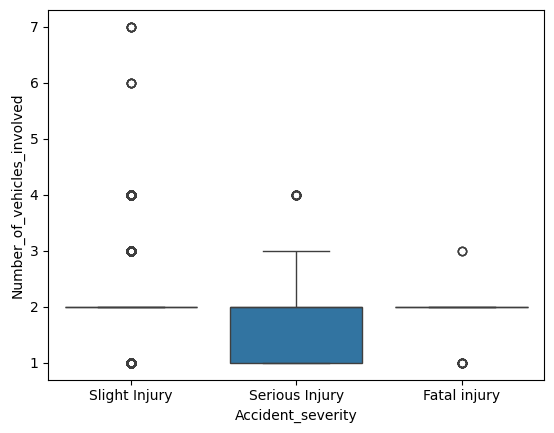

Descriptive Statistics for Number_of_casualties:
                     count  mean  std  min  25%  50%  75%  max
Accident_severity                                            
Fatal injury         82.0   2.0  1.0  1.0  1.0  2.0  4.0  5.0
Serious Injury     1046.0   2.0  1.0  1.0  1.0  1.0  2.0  6.0
Slight Injury      7082.0   1.0  1.0  1.0  1.0  1.0  2.0  8.0


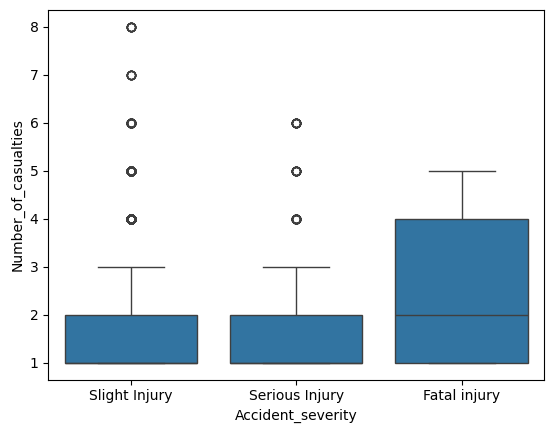

In [95]:
# Descriptive stats and box plots
for col in cont_feat:
    descriptive_stats = df1.groupby(target)[col].describe().round()
    print(f"Descriptive Statistics for {col}:\n {descriptive_stats}")
    sns.boxplot(x=target, y=col, data = df1)
    plt.show()

### ANOVA

In [96]:
# ANOVA 
for col in cont_feat:
    # Group data by target var
    grouped_data = []

    for group in df1[target].unique():
        group_data = df1[col][df1[target] == group]

        grouped_data.append(group_data)

    anova_result = stats.f_oneway(*grouped_data)

    print(f"ANOVA results for {col}:")
    print(f"F-statistic: {anova_result.statistic:.3f}") 
    print(f"p-value: {anova_result.pvalue:.3e}\n")


ANOVA results for Number_of_vehicles_involved:
F-statistic: 27.787
p-value: 9.398e-13

ANOVA results for Number_of_casualties:
F-statistic: 27.269
p-value: 1.572e-12



### Conclusion of Analysis of Continuous Features
Based on the high F-statistics and low p-values, these features are statistically significant to the target variable:
- Number_of_vehicles_involved
- Number_of_casualties

### Data Analysis of Categorical Features

In [99]:
df_cat = df1[cat_feat]
df_cat.head()

,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


In [105]:
cat_feat

['Vehicle_movement',
 'Casualty_class',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Casualty_severity',
 'Work_of_casuality',
 'Fitness_of_casuality',
 'Pedestrian_movement',
 'Cause_of_accident',
 'Accident_severity']

### Chi-Square Test of Independence

#### Contingency Tables

Chi-Square Test for 'Vehicle_movement':
Chi2: 28.24
P-values: 0.25
Degrees of Freedom: 24.00



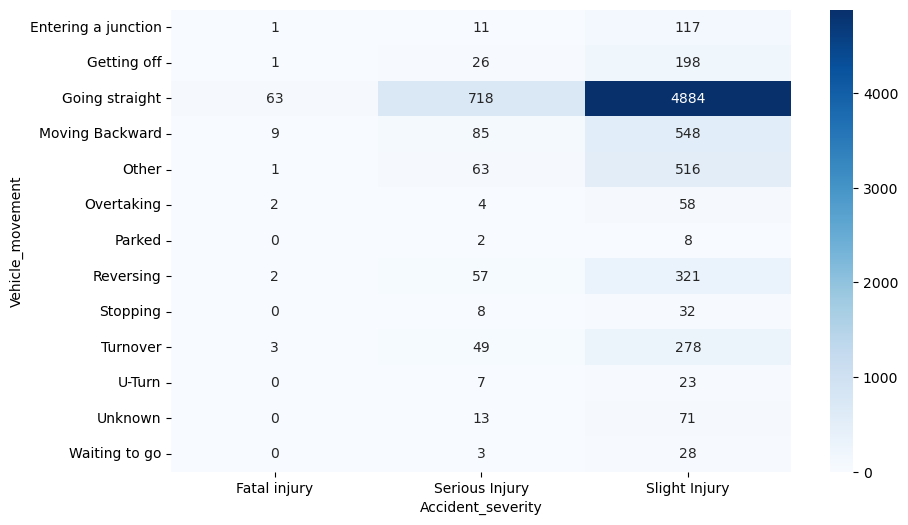

Chi-Square Test for 'Casualty_class':
Chi2: 7.62
P-values: 0.27
Degrees of Freedom: 6.00



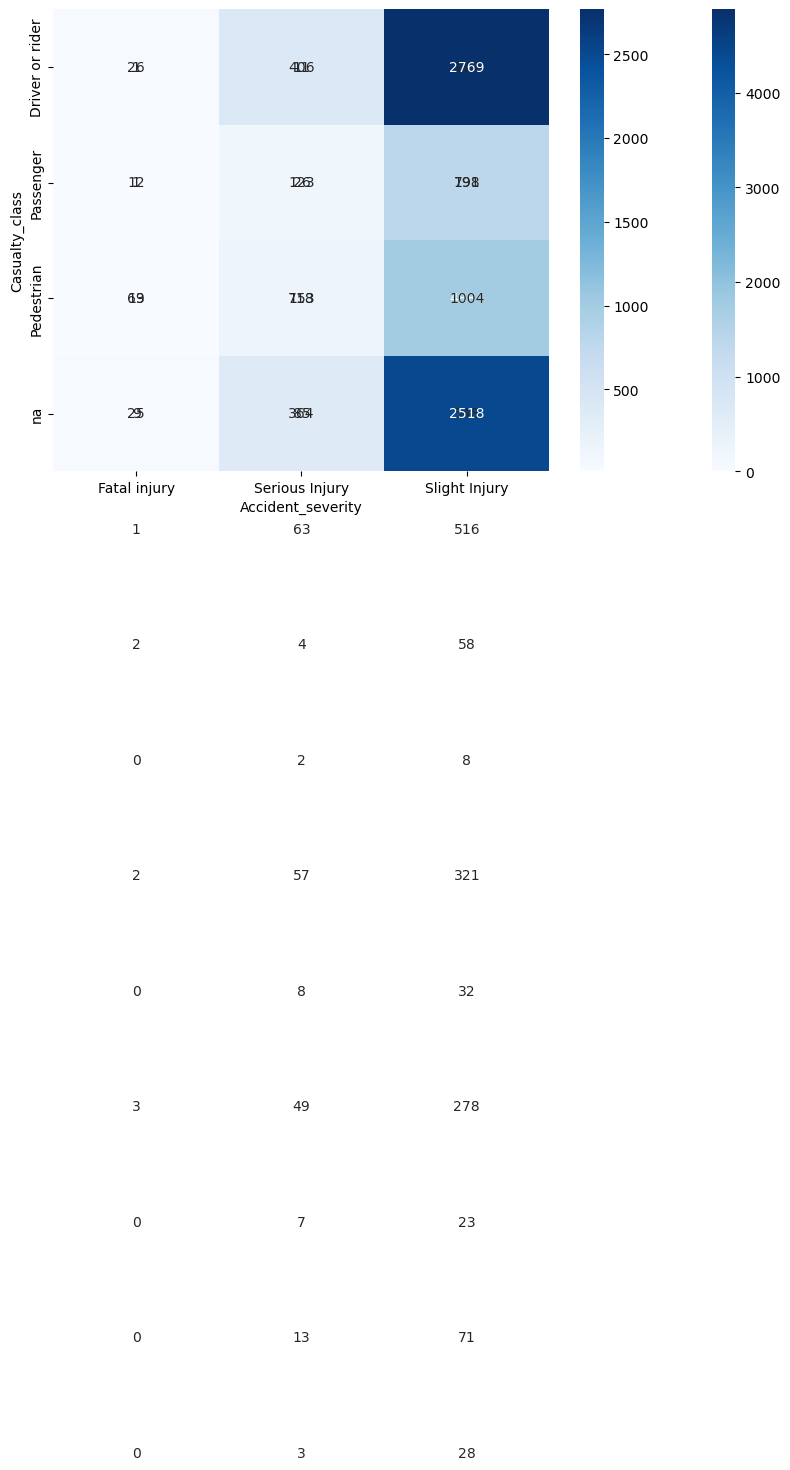

Chi-Square Test for 'Sex_of_casualty':
Chi2: 2.62
P-values: 0.62
Degrees of Freedom: 4.00



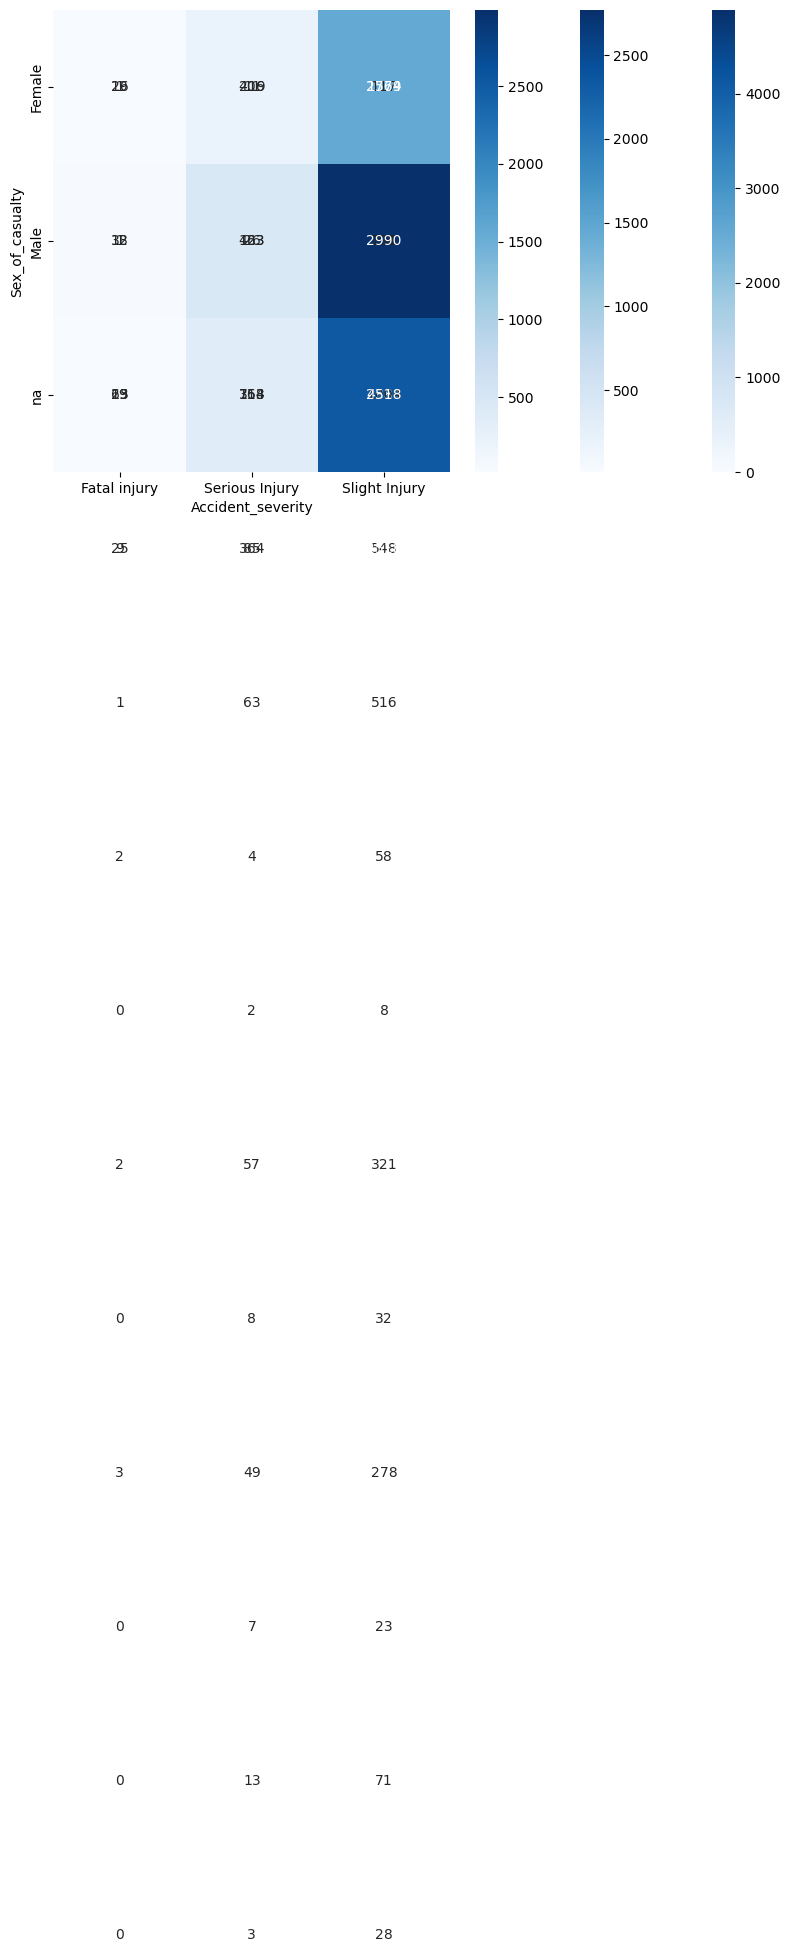

Chi-Square Test for 'Age_band_of_casualty':
Chi2: 13.97
P-values: 0.17
Degrees of Freedom: 10.00



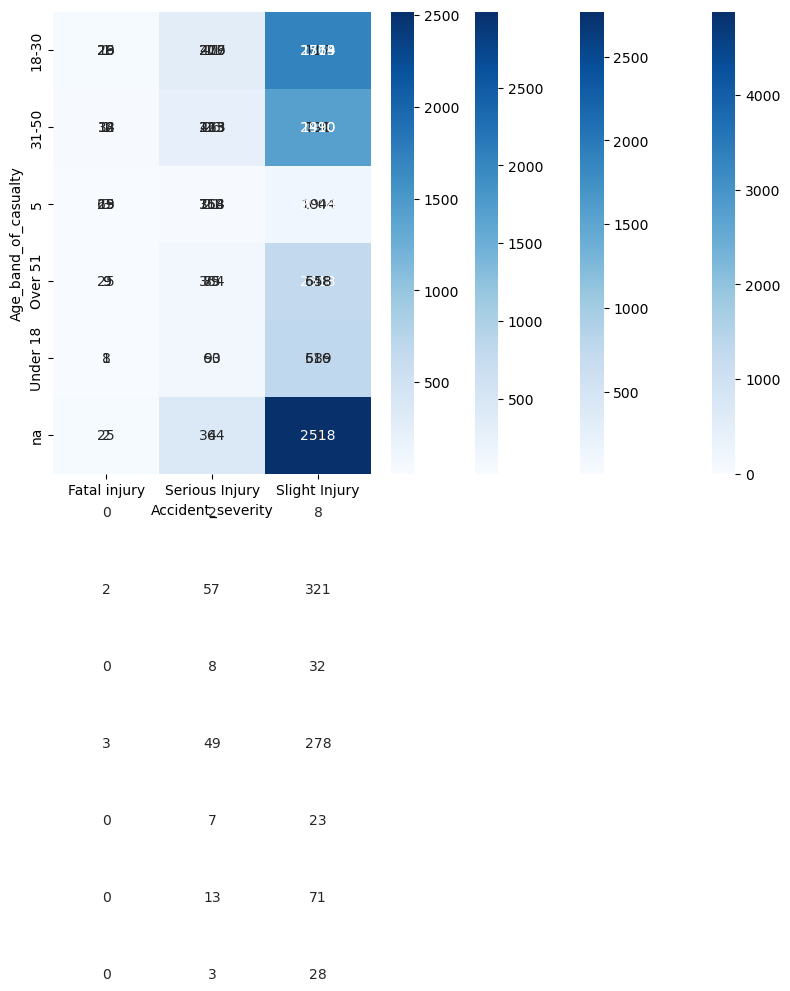

Chi-Square Test for 'Casualty_severity':
Chi2: 1.73
P-values: 0.94
Degrees of Freedom: 6.00



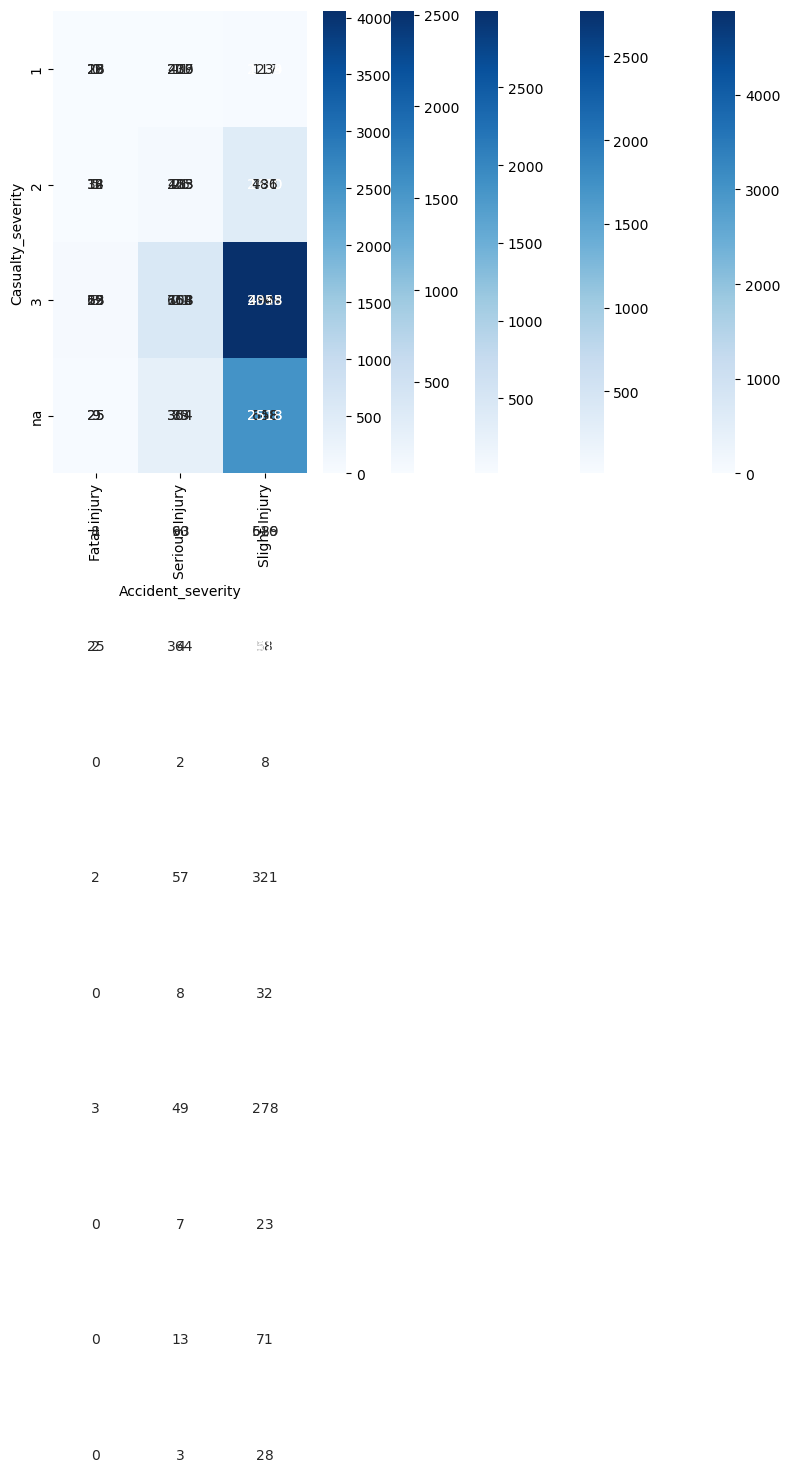

Chi-Square Test for 'Work_of_casuality':
Chi2: 7.99
P-values: 0.79
Degrees of Freedom: 12.00



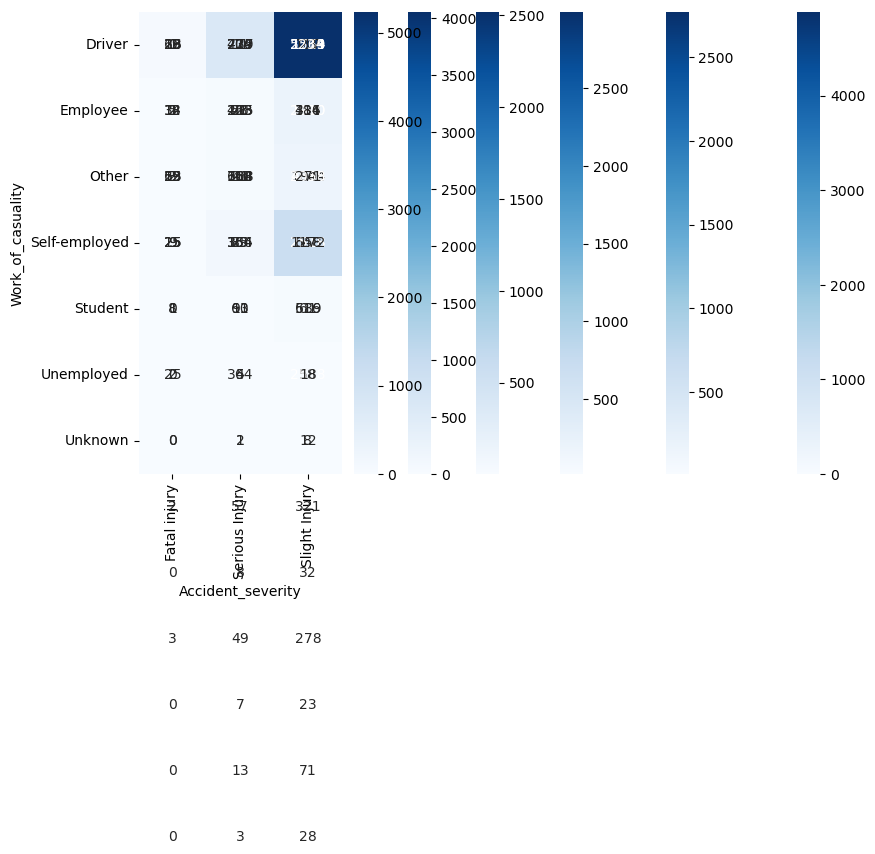

Chi-Square Test for 'Fitness_of_casuality':
Chi2: 2.74
P-values: 0.95
Degrees of Freedom: 8.00



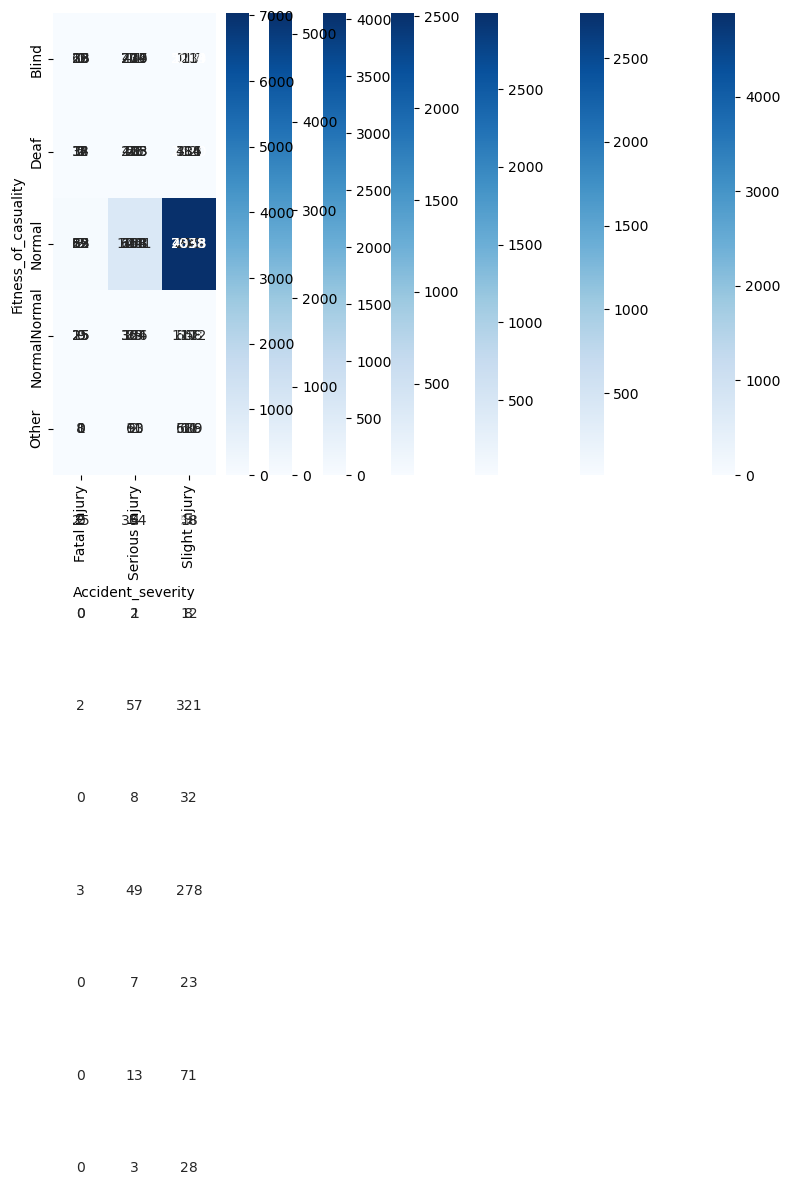

Chi-Square Test for 'Pedestrian_movement':
Chi2: 18.03
P-values: 0.32
Degrees of Freedom: 16.00



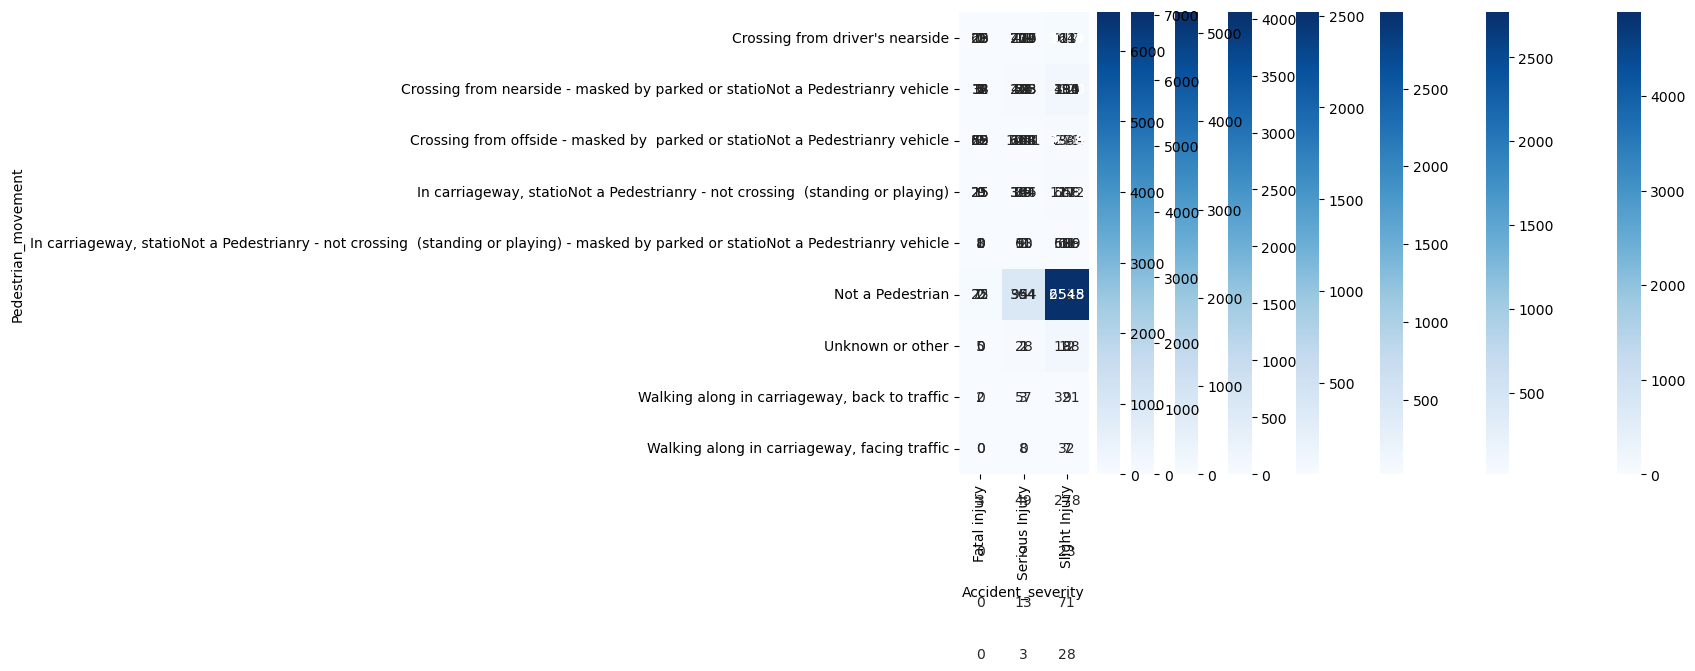

Chi-Square Test for 'Cause_of_accident':
Chi2: 57.20
P-values: 0.02
Degrees of Freedom: 38.00



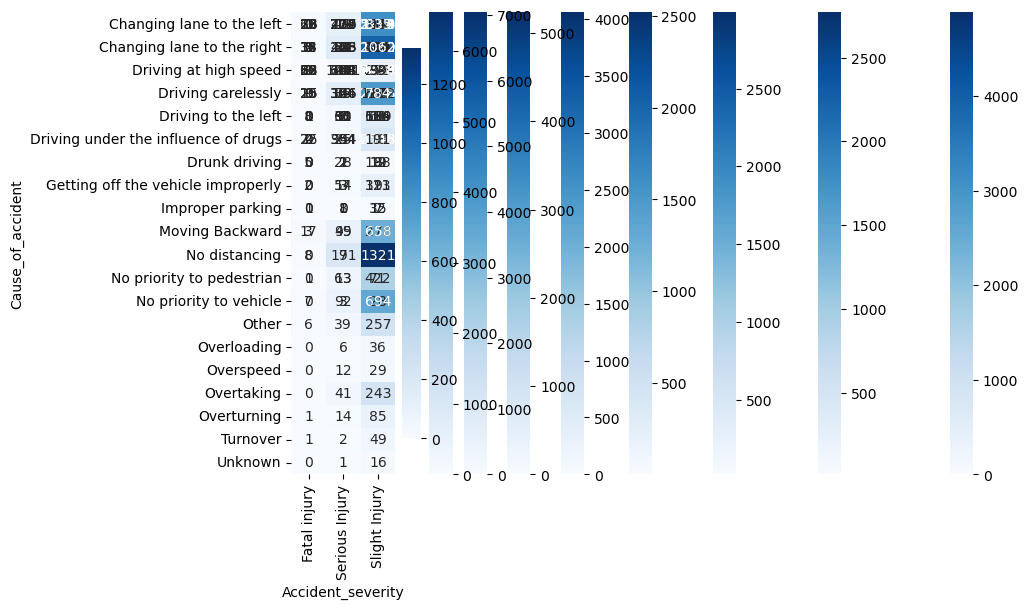

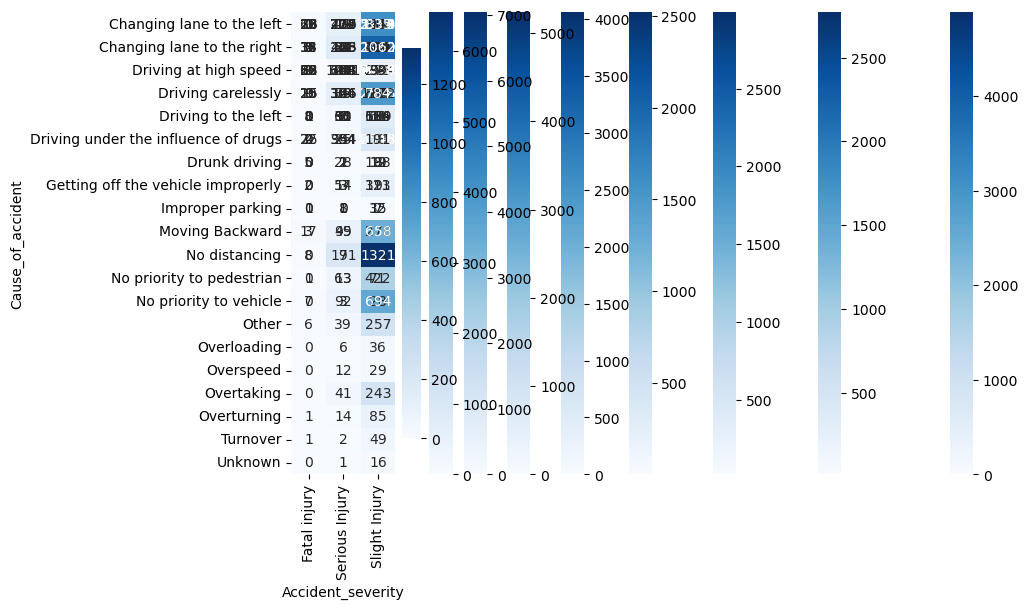

In [128]:
# Contingency tables
plt.figure(figsize=(10, 6))
for col in cat_feat[:-1]:
    ct = pd.crosstab(df_cat[col], df_cat[target])
    # print(ct)
    chi2, p, dof, expected = chi2_contingency(ct)
    print(f"Chi-Square Test for '{col}':")
    print(f"Chi2: {chi2:.02f}")
    print(f"P-values: {p:.02f}")
    print(f"Degrees of Freedom: {dof:.02f}\n")

    sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
    plt.show()
